# Astro505 assignment 1
Brittany Howard

In [1]:
# Adjusting notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from scipy.integrate import quad
from numba import jit
from sklearn import metrics
import scipy.special

from sympy import init_printing  # to do pretty printing
init_printing() 

## Question 1
* Determine the total luminosity, half-light radius, Kron and Petrosian radii of an exponential and de Vaucouleurs intensity profile. 

### Total luminosity for both profiles:

In [3]:
# Symbolic definitions
r = sympy.Symbol('r', positive=True)  # radius
a = sympy.Symbol('a', positive=True)  # scale length
I0 = sympy.Symbol('I0', positive=True)  # central intensity (amplitude)
rhalf = sympy.Symbol('rhalf', positive=True)  # half light radius
# values have to be positive, otherwise it makes no sense

devauc_p = I0 * sympy.exp(-((r / a) ** (1 / 4)))  # devaucouleurs profile
spiral_p = I0 * sympy.exp(-(r / a))  # exponential (spiral) profile

The total luminosity is given by
$$L_\text{tot} =   2\pi \int_0^\infty R \cdot I (R)dR $$
Now calculate the integral with each of the density profiles. 

In [5]:
# help(sympy.integrate)  # execute to read manual
# help(sympy.Symbol)

In [6]:
devauc_Ltot = sympy.integrate(2 * sympy.pi * r * devauc_p, (r, 0, sympy.oo))
spiral_Ltot = sympy.integrate(2 * sympy.pi * r * spiral_p, (r, 0, sympy.oo))

In [113]:
print('Total luminosity for a devaucouleurs and exponential profile respectively:')
devauc_Ltot, spiral_Ltot

Total luminosity for a devaucouleurs and exponential profile respectively:


Why is the one for deVaucouleurs so much higher than the one for exponential? $a$ and $I_0$ don't necessarily have to have the same values.

Now I'll look at half-light radii.  $L_{R_{1/2}} = \frac{L_T}{2} = \int_0^{R_{1/2}} 2 \pi R I(R)dR$.

### Half light radius for exponential profile
Now I need to use this value to find the bounds of the integral in order to get $R_{e}$. Let's look at the epxonential profile first. 

If we do the integral analytically (using integration by parts), we get the following:

$L_{total} = -2\pi I_0 ae^{-R/a}(a+R)$.

When we were gettting the total luminosity, we evaluated with R from 0 to inifinity. Now, we will eveluated from $R=0$ to $R=R_e$, and set that value equal to half of $L_{total}$.

Doing so gives $ae^{-R_e/a}(a+R_e) + 2a^2 = a^2$. Now I'll solve for $R_e$:

In [8]:
# Half-radious calculation
devauc_L_rhalf = devauc_Ltot / 2
spiral_L_rhalf = spiral_Ltot / 2
print('luminosity at the half-light radius for a devaucouleurs and exponential profile respectively: ')
devauc_L_rhalf, spiral_L_rhalf

luminosity at the half-light radius for a devaucouleurs and exponential profile respectively: 


In [86]:
a, R_e = sympy.symbols('a R_e')
sympy.solve(sympy.Eq(a * sympy.exp(-R_e/a) * (a + R_e) + 2 * a**2, a**2), R_e)

Where $W_n$ is the analytic continuation of the product log function. If I factor out the $a$, we can simplify the rest to get a number with wolfram alpha. This gives a value of $R_e$ for an exponential profile equal to $-1.78a$, in units which I assume are kpc. This makes sense becuase $a$ is negative, and this means we will get a positive value for the half-light radius.

### Half light radius for de Vaucouleurs profile

Doing the integral this time gives $8\pi I_0a^2\Gamma(8, R_e) = 20160 \pi I_0 ^2$. We can simplify and get the much simpler $\Gamma(8, R_e) = 2520$. It's interesting to note that this does not depend on $a$ for a de Vaucouleurs profile, but for an exponential one it did. Solving for $R_e$:


In [90]:
R_e = sympy.symbols('R_e')
sympy.solve(sympy.Eq(sympy.lowergamma(8,R_e), 2520), R_e)

NotImplementedError: multiple generators [R_e, exp(R_e)]
No algorithms are implemented to solve equation -R_e**7*exp(-R_e) - 7*R_e**6*exp(-R_e) - 42*R_e**5*exp(-R_e) - 210*R_e**4*exp(-R_e) - 840*R_e**3*exp(-R_e) - 2520*R_e**2*exp(-R_e) - 5040*R_e*exp(-R_e) + 5040 - 5040*exp(-R_e) - 2520

Disappointing. I'll try something similar, maybe it will work:

In [91]:
sympy.solveset(sympy.Eq(sympy.lowergamma(8,R_e), 2520), R_e)

Well, I'm really not sure how to interpret that, so I guess I'll make a plot.

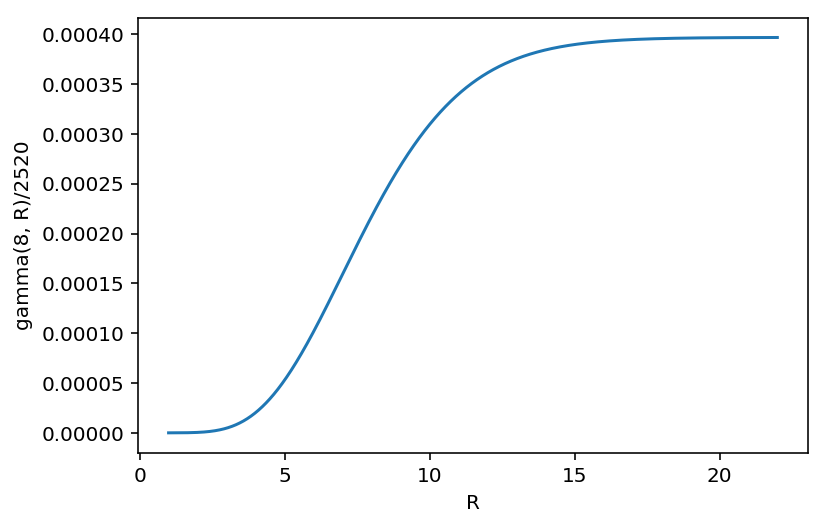

In [85]:
R_array = np.arange(1, 22, .01)
eqt_array = np.empty([len(R_array)])
index = 0
for R in R_array:
    eqt_array[index] = scipy.special.gammainc(8, R) / 2520
    index += 1
plt.plot(R_array, eqt_array)
plt.xlabel("R")
plt.ylabel('gamma(8, R)/2520')

It appears that the value of $R_e$ for a de Vaucouleurs profile is about 15. This number is independent of scale factor, and I'm assuming that the units are kpc.

### Kron radii for both profiles:

Now Kron radius, $R_K = \frac{\int R^2I(R)dR}{\int RI(R)dR}$.

In [116]:
# for a devauc profile
kronTop_devauc = sympy.integrate(r**2 * devauc_p, (r, 0, sympy.oo))
kronBottom_devauc = sympy.integrate(r * devauc_p, (r, 0, sympy.oo))
kron_devauc = kronTop_devauc / kronBottom_devauc

In [117]:
# for exponential profile
kronTop_exp = sympy.integrate(r**2 * spiral_p, (r, 0, sympy.oo))
kronBottom_exp = sympy.integrate(r * spiral_p, (r, 0, sympy.oo))
kron_exp = kronTop_exp / kronBottom_exp

In [118]:
print('Kron radius for a deVaucouleurs profile:')
kron_devauc

Kron radius for a deVaucouleurs profile:


In [119]:
print('Kron radius for an exponential profile:')
kron_exp

Kron radius for an exponential profile:


### Petrosian radius for a deVaucouleurs profile

Now solve for the petrosian radii, given by $I(R_p) = 0.2\frac{L(R_p)}{\pi R_p^2}$.

For de Vaucouleurs, we know that $L(R_p) = 8\pi I_0 a^2 \Gamma(8, R_p)$.


Filling in the expression for intensity and rearranging to isolate $R_p^2$, we can obtain $R_p^2 = 1.6a^2\frac{\Gamma(8,R_p)}{e^(-R_p/a)^{1/4}}$.

At this point I'm just going to assume that sympy would give me some wonky, difficult to interpret result, so I will try a plot again.

/Users/brittanyhoward/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


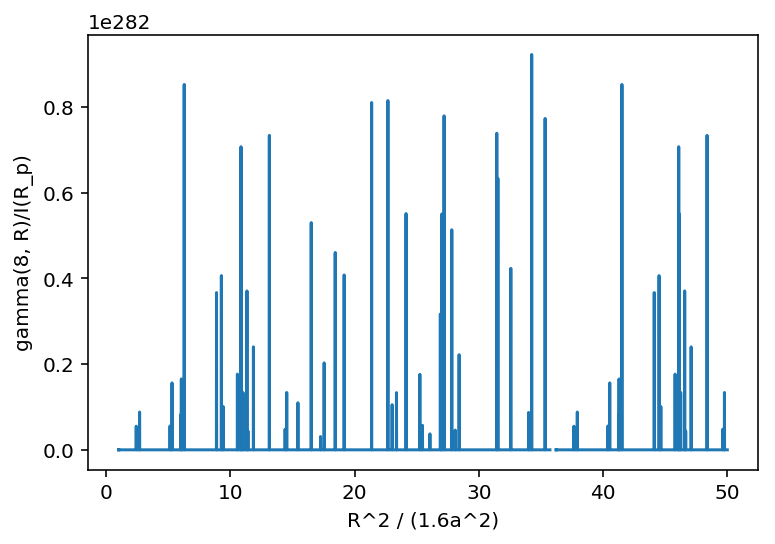

In [112]:
# looking for the value of R at which the function converges to 1
R_array = np.arange(1, 50, .01)
eqt_array = np.empty([len(R_array)])
index = 0
a = 1 # for now, try with other a values next
for R in R_array:
    eqt_array[index] = (scipy.special.gammainc(8, R))/(np.e**((-R/a)**(1/4)))
plt.plot(R_array, eqt_array)
plt.xlabel("R^2 / (1.6a^2)")
plt.ylabel('gamma(8, R)/I(R_p)')

WTF. That's definitely not right... instead of fiddling with this plot more (for some reason the denominator is sometimes coming out as nan), maybe there's another way?

# todo: ask tomi about this ^ 
# all I need to do is solve for R_p in the expression above, and then repeat for an exponential profile

* What multiples of the Kron or Petrosian radius contain 90% of the total luminosity for each profile? 

### Multiples for 90% luminosity - kron, exponential
$0.9 L_{total} = x * L_{Kron}$, so the ratio $x$ we want is given by $x = \frac{0.9L_{total}}{L_{Kron}}$.

From the notes, I know that $x$ should be somewhere around one.

We can find $x$ by setting $0.9L_T$ equal to the total luminosity integral, only with the upper limit changed to $x$ times the expression for the radius in question. 

I'll do it in code now:

In [136]:
final_luminosity_exp = 0.9 * spiral_Ltot  # 90% luminosity for exponential
final_luminosity_devauc = 0.9 * devauc_Ltot  # 90% luminosity for devauc
# for exponential profile, kron radius
# perform the integral
integral_exp_kron = sympy.integrate(2 * sympy.pi * r * spiral_p, (r, 0, x*kron_exp))
integral_exp_kron

In [132]:
# solve for x
x_exp_kron = sympy.solve(sympy.Eq(integral_exp_kron, final_luminosity_exp), x)
x_exp_kron

Okay, so we'll just look at the positive root. For an exponential profile, 90% of total luminosity occurs at 1.994 $\times$ the Kron radius. Not quite 1, but close.

### Multiples for 90% luminosity - kron, deVaucouleurs

In [134]:
# for deVauc profile, kron radius
# perform the integral
integral_devauc_kron = sympy.integrate(2 * sympy.pi * r * devauc_p, (r, 0, x*kron_exp))

KeyboardInterrupt: 

That was running infinitely, not sure why. If use an incomplete gamma function, we would get:

$ L(90\%) =8\pi I_0a^2\gamma(8, 7920xa)= 36288.0 \pi I_0 a^2$, 

which we can simplify to

$L(90\%)=\gamma(8, 7920xa) = 4536$.

Hopefully now sympy will be able to solve it:

In [139]:
x,a = sympy.symbols('x a')

x_devauc_kron = sympy.solve(sympy.Eq(lowergamma(8, 7920*x*a),4536),x)
x_devauc_kron

KeyboardInterrupt: 

Once again, it's running forever. Maybe wolfram alpha can do it?

I tried, and it says: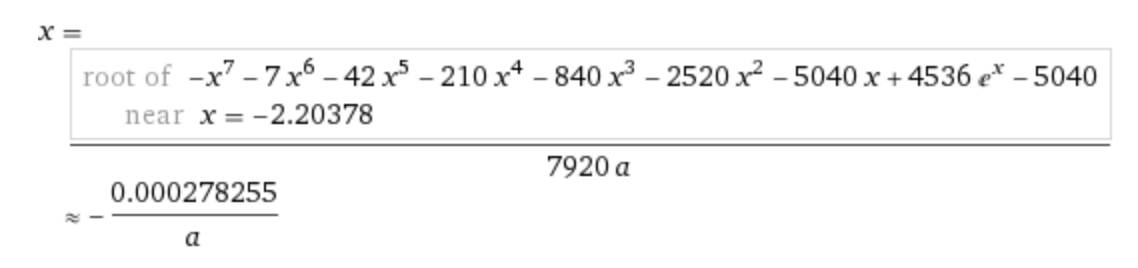

Seems weird... but let's check; if $a=-1.2$, then $x=0.00055651$, which is way too small. What's going wrong here? I really don't know, so for now I will go on to calculating the ratios for the petrosian radii.

Perhaps I need to set some lower limit? I'm not sure if that actually makes sense here...

### Multiples for 90% luminosity - petrosian, exponential

# todo: multiples for petrosian, both exp. and devauc

* Does the value of the Kron and Petrosian radius change if, instead of integrating the profile to infinity one assumes that only a limited part of the source lies above the given isophotal limit of a detector? You may assume circular sources.

No- this is the idea behind Kron and Petrosian radii. They allow us to determine a radius for a galaxy based on statistical analysis of the galaxy's light distribution. They're model independent and allow us to compute radii for galaxies even when very few pixels are detected above the detector's isophotal threshold.

## Question 2
* What is a typical galaxy luminosity? It is often quoted as L∗, the characteristic luminosity of the galaxy luminosity function. 

Typically in the B band, $L^* = 2 \times 10^{10} L_{\odot}$. In magnitudes, $M^* = -20.6$.

* How does this luminosity compare to the value you obtain, say, by determining the luminosity that generates the median luminosity density of galaxies, i.e. galaxies brighter than this limit contribute 50% of the total galaxy luminosity density? 

Luminosity density of galaxies is given by $\mathcal{L} = L \phi (L)dL = \phi^* L^* \Gamma(\alpha + 2)$.

* $\phi^*$ is characteristic density. For B band, it's about $5.5 \times 10^{-3}$ galaxies/cubic Mpc.
* $L^*$ is characteristic luminosity.
* $\alpha$ is faint end slope. For B band, it's about -1.2.

So we want to find luminosity $L$ which gives luminosity density $\mathcal{L}$ equal to half of the total galaxy luminostity density $\mathcal{L}_{total}$. How do we find the total galaxy luminostity density?

Actually, that's maybe not needed. I think what would make more sense is to solve for the total galaxy luminosity density, but not all in one step by integrating from 0 to infinity. Instead, break the integral into two pieces, one from 0 to $L_{m}$, the median luminosity density, and another from $L_{m}$ to infinity. Then we can say that these two pieces of the integral are equal to each other. So in math, this would look like:

$\int_{0}^{L_m} L\phi (L)dL= \int_{L_m}^{\infty} L\phi (L)dL$.

And then we can plug in the Schechter function on either side and get:

$\int_{0}^{L_m} L\phi^*(L/L^*)^\alpha e^{(-L/L^*)}d(L/L^*) = \int_{L_m}^{\infty} L\phi^*(L/L^*)^\alpha e^{(-L/L^*)}d(L/L^*)$.

We can simplify. Define $\beta = L/L^*$. Cancelling out the constants on either side of the equation, this gives us:

$\int_{0}^{L_m} L\beta^\alpha e^{-\beta}d\beta = \int_{L_m}^{\infty} L\beta^\alpha e^{-\beta}d\beta$.

To get the $L$ in terms of $\beta$, we note that $L = L^*\beta$, and $L^*$ is just a constant which we can cancel since it appears on either side of the equation. Also, let's define $\beta_m = L_m/L^*$. So this gives us:

$\int_{0}^{\beta_m} \beta(\beta)^\alpha e^{-\beta}d\beta = \int_{\beta_m}^{\infty} \beta(\beta)^\alpha e^{-\beta}d\beta$, 

which is equal to 

$\int_{0}^{\beta_m}\beta^{(\alpha+1)} e^{-\beta}d\beta = \int_{\beta_m}^{\infty} \beta^{(\alpha+1)} e^{-\beta}d\beta$.

Let's perform these integrals now and see if we can simplify things.

In [75]:
# define symbols
beta_m = sympy.Symbol('beta_m', positive=True)  # L_m/L*
beta = sympy.Symbol('beta', positive=True)  # L/L*
alpha = sympy.Symbol('alpha', positive=False)  # faint end slope = -1.2 

In [76]:
eqt = sympy.Eq(beta**(alpha+1)*sympy.exp(-beta))
left_side = sympy.integrate(eqt, (beta, 0, beta_m))
right_side = sympy.integrate(eqt, (beta, beta_m, sympy.oo))

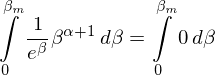

In [77]:
# take a look
left_side

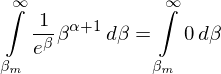

In [78]:
right_side

...what? Don't know why this is going to zero. I guess I will try to figure it out analytically. Pretty sure there is a gamma function involved, so I'll go look at some definitions.

On the left we have a lower incomplete gamma function, where $t=\beta$, $s-1=\alpha+1$ which gives $s =\alpha+2$, and $x=\beta_m$. So the left side can be re-written as $\Gamma(\alpha+2, \beta_m)$. Likewise, the right side is an upper incomplete gamma function, and it can be written as $\gamma(\alpha+2, \beta_m)$.

So we now have the overall equation of $\Gamma(\alpha+2, \beta_m) = \gamma(\alpha+2, \beta_m)$. 

I'll see if sympy can solve this, and if not I'll attempt to solve it graphically.

In [64]:
from sympy.functions.special.gamma_functions import lowergamma, uppergamma

In [79]:
sympy.solve(sympy.Eq(lowergamma(alpha+2, beta_m), uppergamma(alpha+2, beta_m)), beta_m)

NotImplementedError: multiple generators [lowergamma(alpha + 2, beta_m), uppergamma(alpha + 2, beta_m)]
No algorithms are implemented to solve equation lowergamma(alpha + 2, beta_m) - uppergamma(alpha + 2, beta_m)

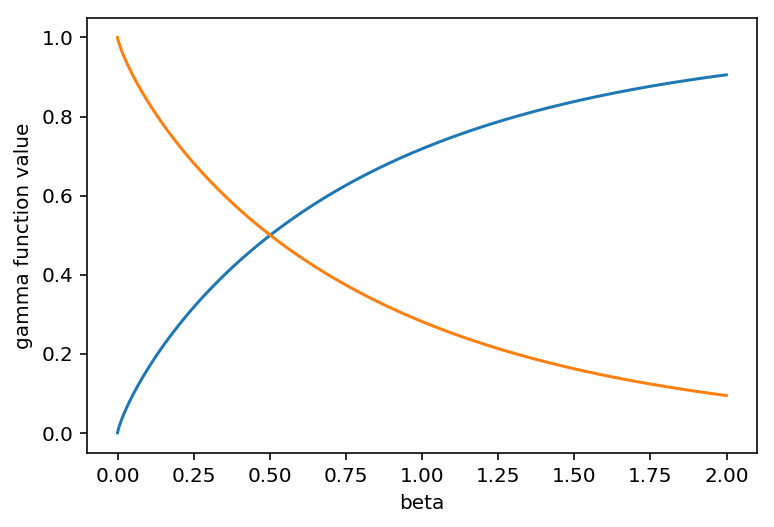

In [81]:
# well, that's unfortunate. I'll do it graphically.

beta = np.arange(0, 2, .001)
# plot both sides of the function and see at which value of beta they intersect
# set alpha = -1.2 for now
a = -1.2
left_side = scipy.special.gammainc(a+2, beta)
right_side = scipy.special.gammaincc(a+2, beta)

plt.plot(beta, left_side)
plt.plot(beta, right_side)
plt.xlabel('beta')
plt.ylabel('gamma function value')

Okay, it looks like the functions intersect at about $\beta_m = 0.50$. This is odd; I didn't expect them to converge without setting a lower limit, which I *know* needs to be done. Anyway, let's just see what this gives us. $\beta_m$ is defined as $L_m/L^*$, so this means that the median luminosity is equal to half of the characteristic luminosity. In math, $L_m = L^*/2$.
 
 
This seems like it could be a reasonable answer, but I am concerned because I got it without setting a lower limit. The only place I think I could have gone wrong are that the incomplete gamma functions I used were normalized (because that was the only relevent code I found), but I don't think it should matter because the argument for both incomplete gamma functions was the same, so any normalization factors should just cancel out.

* Do you have to assume a sensible lower limit on the luminosity of a galaxy to compute this luminosity? Take suitable luminosity function parameters from the course notes.

In theory, yes. Because we are using incomplete gamma functions, we need to have some lower limit for the luminosity of a galaxy in order for the function to converge. So we have to ask how faint is the faintest galaxy? 

From the class notes, "both spirals and ellipticals display surface brightnesses of order 100 $L_⊙$pc$^{-2}$, or $\mu_B = 22$." So since it's of order 100, a value of 100 would be a reasonable lower limit for luminosity per parsec squared. 

## Question 3
* Determine the value of the SDSS g-band and r-band k-correction for an ES0-type and Scd- type galaxy spectrum over the redshift interval 0 < z < 1.
* Plot these functions on one suitably labelled graph. You may download the filter and SED files from the course web site.

In [162]:
# read in the data files 
ESO_data = np.loadtxt('ES0.txt')
Scd_data = np.loadtxt('Scd.txt')
sdss_g_data = np.loadtxt('sdss_g.txt')
sdss_r_data = np.loadtxt('sdss_r.txt')

ESO_wavelength = ESO_data[:,0]
ESO_flux = ESO_data[:,1]
Scd_wavelength = Scd_data[:,0]
Scd_flux = Scd_data[:,1]
sdss_g_wavelength = sdss_g_data[:,0]
sdss_g_response = sdss_g_data[:,1]
sdss_r_wavelength = sdss_r_data[:,0]
sdss_r_response = sdss_r_data[:,1]

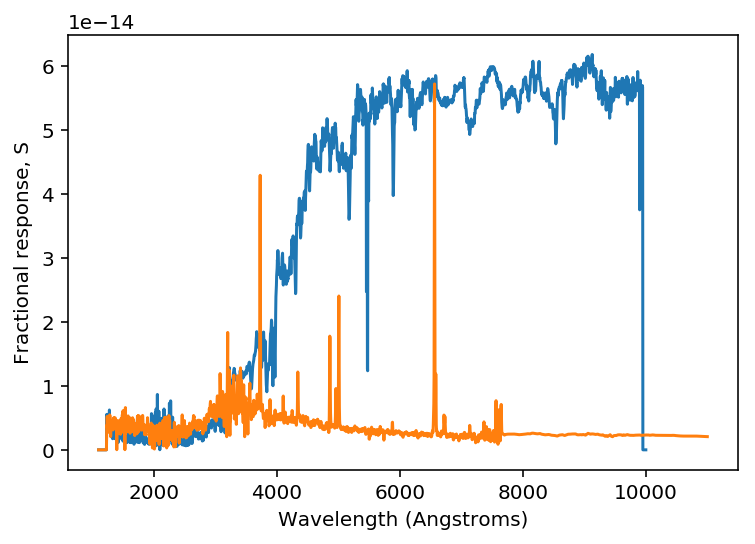

In [163]:
# make a quick plot, not of the k-values
plt.plot(ESO_data[:,0], ESO_data[:,1])  # blue
plt.plot(Scd_data[:,0], Scd_data[:,1])  # orange
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Fractional response, S')


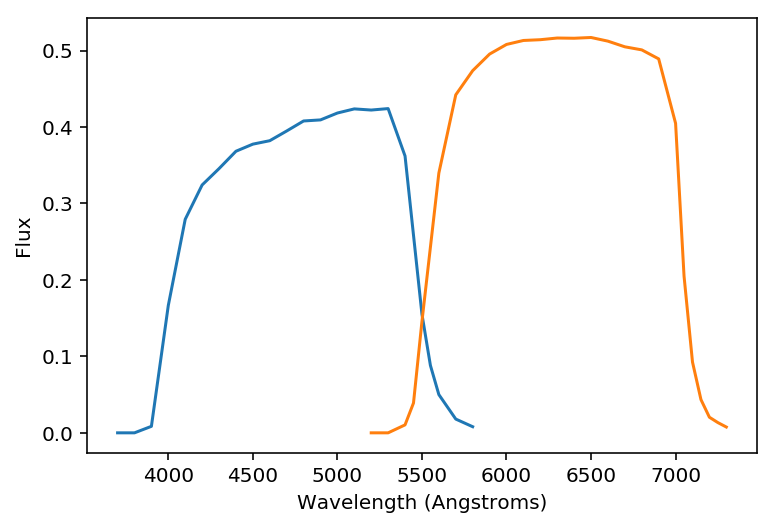

In [164]:
plt.plot(sdss_g_data[:,0], sdss_g_data[:,1])  # blue
plt.plot(sdss_r_data[:,0], sdss_r_data[:,1])  # orange
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')

In [165]:
redshift = np.arange(0, 1.01, 0.01)

numerator_rESO = [0]
denominator_rESO = [0]
numerator_gESO = [0]
denominator_gESO = [0]
numerator_rScd = [0]
denominator_rScd = [0]
numerator_gScd = [0]
denominator_gScd = [0]

In [166]:
# make wavelength corrections
def get_num_den(wavelength_in, wavelength_sdss_in,
         flux_in, response_in, numerator, denominator, redshift):

    for m in range(0, 100):
        z = redshift[m]
        
        for n in range(0, 22):
            wavelength = wavelength_sdss_in[n]
            response = response_in[n]
            
            for j in range(0, 2225):
                if wavelength_in[j]<wavelength/(1+z) and wavelength_in[j+1]>=wavelength/(1+z):
                    numerator.append(response * flux_in[j])
                
                elif wavelength_in[j]<wavelength and wavelength_in[j+1]>=wavelength:
                    denominator.append(response * flux_in[j])
                    
    numerator = np.sum(numerator)
    denominator = np.sum(denominator)
    
    return(numerator, denominator)

In [167]:
# run all the wavelength correction calculations
num_rESO, den_rESO = get_num_den(ESO_wavelength, sdss_r_wavelength,
                                 ESO_flux, sdss_r_response, numerator_rESO,
                                 denominator_rESO, redshift)

num_gESO, den_gESO = get_num_den(ESO_wavelength, sdss_g_wavelength,
                                 ESO_flux, sdss_g_response, numerator_gESO,
                                 denominator_gESO, redshift)

num_rScd, den_rScd = get_num_den(Scd_wavelength, sdss_r_wavelength,
                                 Scd_flux, sdss_r_response, numerator_rScd,
                                 denominator_rScd, redshift)

num_gScd, den_gScd = get_num_den(Scd_wavelength, sdss_g_wavelength,
                                 Scd_flux, sdss_g_response, numerator_gScd,
                                 denominator_gScd, redshift)

In [171]:
# calculate k values for each combination
def getk (Z, numerator, denominator):
    k = 2.5 * np.log(1+Z)-2.5*np.log(numerator/denominator)
    return(k)

k_gESO = getk(redshift, num_gESO, den_gESO)
k_rESO = getk(redshift, num_rESO, den_rESO)
k_gScd = getk(redshift, num_gScd, den_gScd)
k_rScd = getk(redshift, num_rScd, den_rScd)

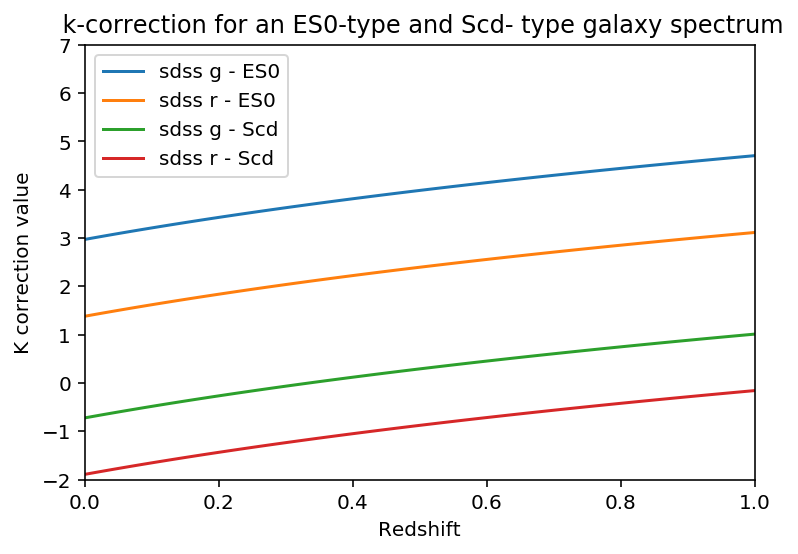

In [177]:
# make the plot
plt.plot(redshift, k_gESO, label='sdss g - ES0')
plt.plot(redshift, k_rESO, label='sdss r - ES0')
plt.plot(redshift, k_gScd, label='sdss g - Scd')
plt.plot(redshift, k_rScd, label='sdss r - Scd')
plt.legend(loc=2)
plt.xlabel('Redshift')
plt.ylabel('K correction value')
plt.title(' k-correction for an ES0-type and Scd- type galaxy spectrum')
plt.xlim(0,1)
plt.ylim(-2,7)